In [10]:
import pandas as pd
import numpy as np
from sklearn.externals.six import StringIO
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [11]:
customers_df = pd.read_csv('bank-full.csv', sep = ';')
customers_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [12]:
data_df = customers_df.drop(['contact', 'month', 'day'],
  axis=1)

In [13]:
data_df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,198,1,-1,0,unknown,no


In [14]:
#converting categorical values into numeric

customers_df = data_df
dict_past = {'failure': -1, 'other': 0, 'unknown': 0, 'success':1} 
dict_yn = {'no': 0, 'yes':1}
dict_edu = {'primary': 1, 'secondary':2, 'tertiary': 1, 'unknown': 1.5}
dict_mar = {'single': 1, 'married':0, 'divorced': 0}
dict_nojob = {'retired': 1, 'student':1, 'unenployed': 1}


customers_df['poutcome'] = customers_df['poutcome'].map(dict_past)
customers_df['housing'] = customers_df['housing'].map(dict_yn)
customers_df['loan'] = customers_df['loan'].map(dict_yn)
customers_df['default'] = customers_df['default'].map(dict_yn)
customers_df['education'] = customers_df['education'].map(dict_edu)
customers_df['marital'] = customers_df['marital'].map(dict_mar)
customers_df['job'] = customers_df['job'].map(dict_nojob)
customers_df['job']  = customers_df['job'].fillna(0)

customers_df['y'] = customers_df['y'].map(dict_yn)

In [15]:
X = customers_df.drop('y', axis = 1)
y = customers_df['y']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, shuffle=True, random_state=100, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(33908, 13)
(33908,)
(11303, 13)
(11303,)


In [17]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 14 columns):
age          45211 non-null int64
job          45211 non-null float64
marital      45211 non-null int64
education    45211 non-null float64
default      45211 non-null int64
balance      45211 non-null int64
housing      45211 non-null int64
loan         45211 non-null int64
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null int64
y            45211 non-null int64
dtypes: float64(2), int64(12)
memory usage: 4.8 MB


In [19]:
neural_network_clf = MLPClassifier(random_state=1, max_iter=300)
neural_network_clf.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=300, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [20]:
neural_network_clf.score(X_train, y_train)

0.8766662734457945

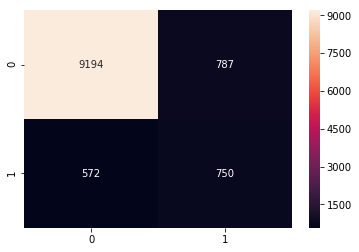

In [21]:
label_pred=neural_network_clf.predict(X_test)
cf_matrix = confusion_matrix(y_test,label_pred)
sns.heatmap(cf_matrix, annot=True, fmt='g')